<a href="https://colab.research.google.com/github/JoaquinGonzalezSimon/Data_science_and_ML_from_Medium/blob/main/220723_Best_Streaming_Service_Analysis_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This project was taken from the following link and I use it to practice my skills

https://thecleverprogrammer.com/2021/01/21/best-streaming-service-analysis-with-python/

https://medium.com/coders-camp/180-data-science-and-machine-learning-projects-with-python-6191bc7b9db9

In [2]:
import pandas as pd
import numpy as np
import plotly
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot
from plotly.subplots import make_subplots

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [78]:
data = pd.read_csv('/content/drive/MyDrive/Ironhack/DBs/tv_shows.csv')

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5368 entries, 0 to 5367
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       5368 non-null   int64 
 1   ID               5368 non-null   int64 
 2   Title            5368 non-null   object
 3   Year             5368 non-null   int64 
 4   Age              3241 non-null   object
 5   IMDb             4406 non-null   object
 6   Rotten Tomatoes  5368 non-null   object
 7   Netflix          5368 non-null   int64 
 8   Hulu             5368 non-null   int64 
 9   Prime Video      5368 non-null   int64 
 10  Disney+          5368 non-null   int64 
 11  Type             5368 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 503.4+ KB


In [80]:
data.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,Breaking Bad,2008,18+,9.4/10,100/100,1,0,0,0,1
1,1,2,Stranger Things,2016,16+,8.7/10,96/100,1,0,0,0,1
2,2,3,Attack on Titan,2013,18+,9.0/10,95/100,1,1,0,0,1
3,3,4,Better Call Saul,2015,18+,8.8/10,94/100,1,0,0,0,1
4,4,5,Dark,2017,16+,8.8/10,93/100,1,0,0,0,1


In [81]:
data.drop_duplicates(subset='Title', keep='first', inplace=True)

In [82]:
data['Rotten Tomatoes'].sort_values().unique()

array(['10/100', '100/100', '13/100', '14/100', '16/100', '17/100',
       '18/100', '19/100', '20/100', '21/100', '22/100', '23/100',
       '24/100', '25/100', '26/100', '27/100', '28/100', '29/100',
       '30/100', '31/100', '32/100', '33/100', '34/100', '35/100',
       '36/100', '37/100', '38/100', '39/100', '40/100', '41/100',
       '42/100', '43/100', '44/100', '45/100', '46/100', '47/100',
       '48/100', '49/100', '50/100', '51/100', '52/100', '53/100',
       '54/100', '55/100', '56/100', '57/100', '58/100', '59/100',
       '60/100', '61/100', '62/100', '63/100', '64/100', '65/100',
       '66/100', '67/100', '68/100', '69/100', '70/100', '71/100',
       '72/100', '73/100', '74/100', '75/100', '76/100', '77/100',
       '78/100', '79/100', '80/100', '81/100', '82/100', '83/100',
       '84/100', '85/100', '86/100', '87/100', '88/100', '89/100',
       '90/100', '91/100', '92/100', '93/100', '94/100', '95/100',
       '96/100'], dtype=object)

In [83]:
data['Rotten Tomatoes'] = data['Rotten Tomatoes'].apply(lambda x: x.rstrip('/100'))
data['Rotten Tomatoes'].sort_values().unique()

array(['', '13', '14', '16', '17', '18', '19', '2', '22', '23', '24',
       '25', '26', '27', '28', '29', '3', '32', '33', '34', '35', '36',
       '37', '38', '39', '4', '42', '43', '44', '45', '46', '47', '48',
       '49', '5', '52', '53', '54', '55', '56', '57', '58', '59', '6',
       '62', '63', '64', '65', '66', '67', '68', '69', '7', '72', '73',
       '74', '75', '76', '77', '78', '79', '8', '82', '83', '84', '85',
       '86', '87', '88', '89', '9', '92', '93', '94', '95', '96'],
      dtype=object)

In [84]:
data.loc[data['Rotten Tomatoes'] == '', 'Rotten Tomatoes'] = '0'

In [85]:
data['Rotten Tomatoes'].value_counts()

0     306
5     244
4     198
6     178
13    174
     ... 
92      7
93      6
95      2
94      2
96      1
Name: Rotten Tomatoes, Length: 76, dtype: int64

In [86]:
data['Rotten Tomatoes'].sort_values().unique()

array(['0', '13', '14', '16', '17', '18', '19', '2', '22', '23', '24',
       '25', '26', '27', '28', '29', '3', '32', '33', '34', '35', '36',
       '37', '38', '39', '4', '42', '43', '44', '45', '46', '47', '48',
       '49', '5', '52', '53', '54', '55', '56', '57', '58', '59', '6',
       '62', '63', '64', '65', '66', '67', '68', '69', '7', '72', '73',
       '74', '75', '76', '77', '78', '79', '8', '82', '83', '84', '85',
       '86', '87', '88', '89', '9', '92', '93', '94', '95', '96'],
      dtype=object)

In [87]:
data['Rotten Tomatoes'] = pd.to_numeric(data['Rotten Tomatoes'])

In [88]:
data['Rotten Tomatoes'].sort_values().unique()

array([ 0,  2,  3,  4,  5,  6,  7,  8,  9, 13, 14, 16, 17, 18, 19, 22, 23,
       24, 25, 26, 27, 28, 29, 32, 33, 34, 35, 36, 37, 38, 39, 42, 43, 44,
       45, 46, 47, 48, 49, 52, 53, 54, 55, 56, 57, 58, 59, 62, 63, 64, 65,
       66, 67, 68, 69, 72, 73, 74, 75, 76, 77, 78, 79, 82, 83, 84, 85, 86,
       87, 88, 89, 92, 93, 94, 95, 96])

In [89]:
data.IMDb.sort_values().unique()

array(['1.1/10', '1.5/10', '1.8/10', '1.9/10', '2.3/10', '2.4/10',
       '2.5/10', '2.6/10', '2.7/10', '2.8/10', '2.9/10', '3.0/10',
       '3.1/10', '3.2/10', '3.3/10', '3.4/10', '3.5/10', '3.6/10',
       '3.7/10', '3.8/10', '3.9/10', '4.0/10', '4.1/10', '4.2/10',
       '4.3/10', '4.4/10', '4.5/10', '4.6/10', '4.7/10', '4.8/10',
       '4.9/10', '5.0/10', '5.1/10', '5.2/10', '5.3/10', '5.4/10',
       '5.5/10', '5.6/10', '5.7/10', '5.8/10', '5.9/10', '6.0/10',
       '6.1/10', '6.2/10', '6.3/10', '6.4/10', '6.5/10', '6.6/10',
       '6.7/10', '6.8/10', '6.9/10', '7.0/10', '7.1/10', '7.2/10',
       '7.3/10', '7.4/10', '7.5/10', '7.6/10', '7.7/10', '7.8/10',
       '7.9/10', '8.0/10', '8.1/10', '8.2/10', '8.3/10', '8.4/10',
       '8.5/10', '8.6/10', '8.7/10', '8.8/10', '8.9/10', '9.0/10',
       '9.1/10', '9.2/10', '9.3/10', '9.4/10', '9.5/10', '9.6/10', nan],
      dtype=object)

In [93]:
data['IMDb'] = data['IMDb'].astype('str')

In [94]:
data.IMDb.sort_values().unique()

array(['1.1/10', '1.5/10', '1.8/10', '1.9/10', '2.3/10', '2.4/10',
       '2.5/10', '2.6/10', '2.7/10', '2.8/10', '2.9/10', '3.0/10',
       '3.1/10', '3.2/10', '3.3/10', '3.4/10', '3.5/10', '3.6/10',
       '3.7/10', '3.8/10', '3.9/10', '4.0/10', '4.1/10', '4.2/10',
       '4.3/10', '4.4/10', '4.5/10', '4.6/10', '4.7/10', '4.8/10',
       '4.9/10', '5.0/10', '5.1/10', '5.2/10', '5.3/10', '5.4/10',
       '5.5/10', '5.6/10', '5.7/10', '5.8/10', '5.9/10', '6.0/10',
       '6.1/10', '6.2/10', '6.3/10', '6.4/10', '6.5/10', '6.6/10',
       '6.7/10', '6.8/10', '6.9/10', '7.0/10', '7.1/10', '7.2/10',
       '7.3/10', '7.4/10', '7.5/10', '7.6/10', '7.7/10', '7.8/10',
       '7.9/10', '8.0/10', '8.1/10', '8.2/10', '8.3/10', '8.4/10',
       '8.5/10', '8.6/10', '8.7/10', '8.8/10', '8.9/10', '9.0/10',
       '9.1/10', '9.2/10', '9.3/10', '9.4/10', '9.5/10', '9.6/10', 'nan'],
      dtype=object)

In [95]:
data['IMDb'] = data['IMDb'].apply(lambda x: x.rstrip('/10'))

In [96]:
data['IMDb'].value_counts()

nan    962
8.     324
7.     319
7.4    208
7.3    191
      ... 
1.9      1
1.5      1
2.7      1
1.       1
9.5      1
Name: IMDb, Length: 72, dtype: int64

In [98]:
data['IMDb'] = data['IMDb'].astype('float')

In [99]:
data['IMDb'] = data['IMDb'].fillna(0)

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5368 entries, 0 to 5367
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       5368 non-null   int64  
 1   ID               5368 non-null   int64  
 2   Title            5368 non-null   object 
 3   Year             5368 non-null   int64  
 4   Age              3241 non-null   object 
 5   IMDb             5368 non-null   float64
 6   Rotten Tomatoes  5368 non-null   int64  
 7   Netflix          5368 non-null   int64  
 8   Hulu             5368 non-null   int64  
 9   Prime Video      5368 non-null   int64  
 10  Disney+          5368 non-null   int64  
 11  Type             5368 non-null   int64  
dtypes: float64(1), int64(9), object(2)
memory usage: 545.2+ KB


In [101]:
data.IMDb.value_counts()

0.0    962
8.0    324
7.0    319
7.4    208
7.3    191
      ... 
1.9      1
1.5      1
2.7      1
1.0      1
9.5      1
Name: IMDb, Length: 72, dtype: int64

In [102]:
data_long = pd.melt(data[['Title', 'Netflix', 'Hulu', 'Disney+', 'Prime Video']], 
                    id_vars='Title', var_name='StreamingOn', value_name='Present')

In [103]:
data_long.head()

,Title,StreamingOn,Present
0,Breaking Bad,Netflix,1
1,Stranger Things,Netflix,1
2,Attack on Titan,Netflix,1
3,Better Call Saul,Netflix,1
4,Dark,Netflix,1


In [104]:
data_long.Present.value_counts()

0    15698
1     5774
Name: Present, dtype: int64

In [113]:
data_long[data_long['Title'] == 'Attack on Titan']

,Title,StreamingOn,Present
2,Attack on Titan,Netflix,1
5370,Attack on Titan,Hulu,1
10738,Attack on Titan,Disney+,0
16106,Attack on Titan,Prime Video,0


In [114]:
data[data['Title'] == 'Attack on Titan']

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
2,2,3,Attack on Titan,2013,18+,9.0,95,1,1,0,0,1


In [115]:
data_long[data_long['Present'] == 1]

,Title,StreamingOn,Present
0,Breaking Bad,Netflix,1
1,Stranger Things,Netflix,1
2,Attack on Titan,Netflix,1
3,Better Call Saul,Netflix,1
4,Dark,Netflix,1
...,...,...,...
21156,Breakfast with Bevan,Prime Video,1
21157,"Gas, Grub, and Ghosts",Prime Video,1
21158,Extreme Constructions,Prime Video,1
21159,Nature's Treasure Islands,Prime Video,1


In [116]:
data_long = data_long[data_long['Present'] == 1]

In [117]:
data_long.head()

,Title,StreamingOn,Present
0,Breaking Bad,Netflix,1
1,Stranger Things,Netflix,1
2,Attack on Titan,Netflix,1
3,Better Call Saul,Netflix,1
4,Dark,Netflix,1


In [118]:
data_long.drop(columns='Present', inplace=True)

In [120]:
data_long.head()

,Title,StreamingOn
0,Breaking Bad,Netflix
1,Stranger Things,Netflix
2,Attack on Titan,Netflix
3,Better Call Saul,Netflix
4,Dark,Netflix


In [121]:
data_combined = data_long.merge(data, on='Title', how='inner')

In [122]:
data_combined.head()

,Title,StreamingOn,Unnamed: 0,ID,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,Breaking Bad,Netflix,0,1,2008,18+,9.4,0,1,0,0,0,1
1,Stranger Things,Netflix,1,2,2016,16+,8.7,96,1,0,0,0,1
2,Attack on Titan,Netflix,2,3,2013,18+,9.0,95,1,1,0,0,1
3,Attack on Titan,Hulu,2,3,2013,18+,9.0,95,1,1,0,0,1
4,Better Call Saul,Netflix,3,4,2015,18+,8.8,94,1,0,0,0,1


In [123]:
data_combined.drop(columns=['Unnamed: 0', 'Netflix', 'Hulu', 'Prime Video', 
                            'Disney+', 'Type'], inplace=True)

In [124]:
data_combined.head()

,Title,StreamingOn,ID,Year,Age,IMDb,Rotten Tomatoes
0,Breaking Bad,Netflix,1,2008,18+,9.4,0
1,Stranger Things,Netflix,2,2016,16+,8.7,96
2,Attack on Titan,Netflix,3,2013,18+,9.0,95
3,Attack on Titan,Hulu,3,2013,18+,9.0,95
4,Better Call Saul,Netflix,4,2015,18+,8.8,94


In [128]:
data_both_ratings = data_combined[(data_combined.IMDb > 0) 
                    & (data_combined['Rotten Tomatoes'] > 0)]

In [129]:
data_both_ratings

,Title,StreamingOn,ID,Year,Age,IMDb,Rotten Tomatoes
1,Stranger Things,Netflix,2,2016,16+,8.7,96
2,Attack on Titan,Netflix,3,2013,18+,9.0,95
3,Attack on Titan,Hulu,3,2013,18+,9.0,95
4,Better Call Saul,Netflix,4,2015,18+,8.8,94
5,Dark,Netflix,5,2017,16+,8.8,93
...,...,...,...,...,...,...,...
5202,Gok's Clothes Roadshow,Prime Video,4784,2011,NaN,6.4,24
5203,Scandalous Overtures,Prime Video,4785,2014,NaN,5.6,24
5206,Rakuen Miyoshi Kazuyoshi to meguru rakuen no tabi,Prime Video,4788,2016,NaN,4.8,24
5207,State Parole,Prime Video,4789,2008,NaN,4.6,24


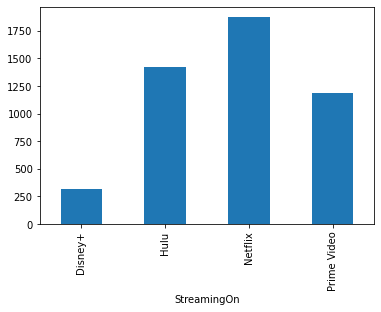

In [130]:
data_both_ratings.groupby('StreamingOn').Title.count().plot(kind='bar')

In [131]:
figure = []
figure.append(px.violin(data_both_ratings, x='StreamingOn', y='IMDb', color='StreamingOn'))
figure.append(px.violin(data_both_ratings, x='StreamingOn', y='Rotten Tomatoes', color='StreamingOn'))

In [132]:
fig = make_subplots(rows=2, cols=4, shared_yaxes=True)
for i in range(2):
  for j in range(4):
    fig.add_trace(figure[i]['data'][j], row=i+1, col=j+1)
fig.update_layout(autosize=False, width=800, height=800)
fig.show()

In [133]:
px.scatter(data_both_ratings, x='IMDb', y='Rotten Tomatoes', color='StreamingOn')